<a href="https://colab.research.google.com/github/mobius29er/AIML_Class/blob/main/try_it_14_1_required.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Required Try-It Activity 14.1: Generating Overfit Models

By default, you scikitlearn tree models will grow until every node is pure.  To explore this, you are to build different models using the `max_depth` parameter and determine when the tree begins to overfit the data.  For depths from `max_depth = 1` until the tree is completed, keep track of the accuracy on training vs. test data and generate a plot with depths as the horizontal axis and accuracy as the vertical axis for train and test data.  

Repeat this process with different splits of the data to determine at what depth the tree begins to overfit.  Share your results with your peers and discuss your approach to generating the visualization.  What are the consequences of this overfitting for your approach to building Decision Trees?   We provide a small dataset with health data where your goal is to predict whether or not the individuals survive.

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
data = pd.read_csv('data/Whickham.txt')

In [3]:
data.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [4]:
X = data[['smoker', 'age']]
y = data['outcome']

GridSearch

In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
# Define hyperparameter grid

tree_param = {

            'criterion': ['gini', 'entropy'],

            'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]

}

In [7]:
# Instantiate DecisionTreeClassifier and GridSearchCV

clf = GridSearchCV(DecisionTreeClassifier(), tree_param, cv=5)

In [8]:
# Convert categorical features to numerical using one-hot encoding
X_encoded = pd.get_dummies(X, columns=['smoker'], drop_first=True)

In [9]:
# Fit model to data

clf.fit(X_encoded, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]})

In [10]:
# Get best hyperparameters

best_params = clf.best_params_

In [11]:
import matplotlib.pyplot as plt
import numpy as np

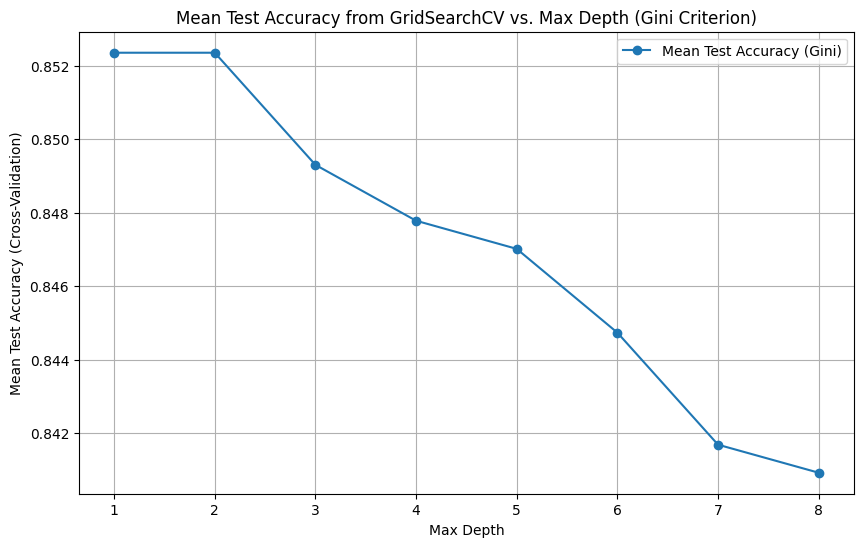

In [12]:
# Get the results from GridSearchCV and convert to DataFrame
results_df = pd.DataFrame(clf.cv_results_)

# Extract mean test scores and max_depth for 'gini' criterion
gini_results_df = results_df[results_df['param_criterion'] == 'gini']
mean_test_scores_gini = gini_results_df['mean_test_score']
max_depths_gini = gini_results_df['param_max_depth']

# Plotting the mean test scores for 'gini' criterion
plt.figure(figsize=(10, 6))
plt.plot(max_depths_gini, mean_test_scores_gini, marker='o', label='Mean Test Accuracy (Gini)')
plt.title('Mean Test Accuracy from GridSearchCV vs. Max Depth (Gini Criterion)')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Accuracy (Cross-Validation)')
plt.xticks(max_depths_gini)
plt.legend()
plt.grid(True)
plt.show()

# RandomizedSearchCV

In [13]:
from sklearn.model_selection import RandomizedSearchCV

In [14]:
# Instantiate a Decision Tree classifier

tree = DecisionTreeClassifier()

In [15]:
# Define hyperparameter distributions (e.g., max_depth, min_samples_split)

param_dist = {

            'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],

            'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],

            'criterion': ['gini', 'entropy']

}

In [16]:
# Instantiate RandomizedSearchCV

tree_cv = RandomizedSearchCV(tree, param_dist, cv=5)

In [17]:
# Fit it to the data

tree_cv.fit(X_encoded, y)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 9, 10]})

In [18]:
# Print the tuned parameters and score

print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))

Tuned Decision Tree Parameters: {'min_samples_split': 10, 'max_depth': 1, 'criterion': 'gini'}


In [19]:
# Print the best cross-validation score
print("Best cross-validation accuracy from RandomizedSearchCV: {:.4f}".format(tree_cv.best_score_))

Best cross-validation accuracy from RandomizedSearchCV: 0.8524


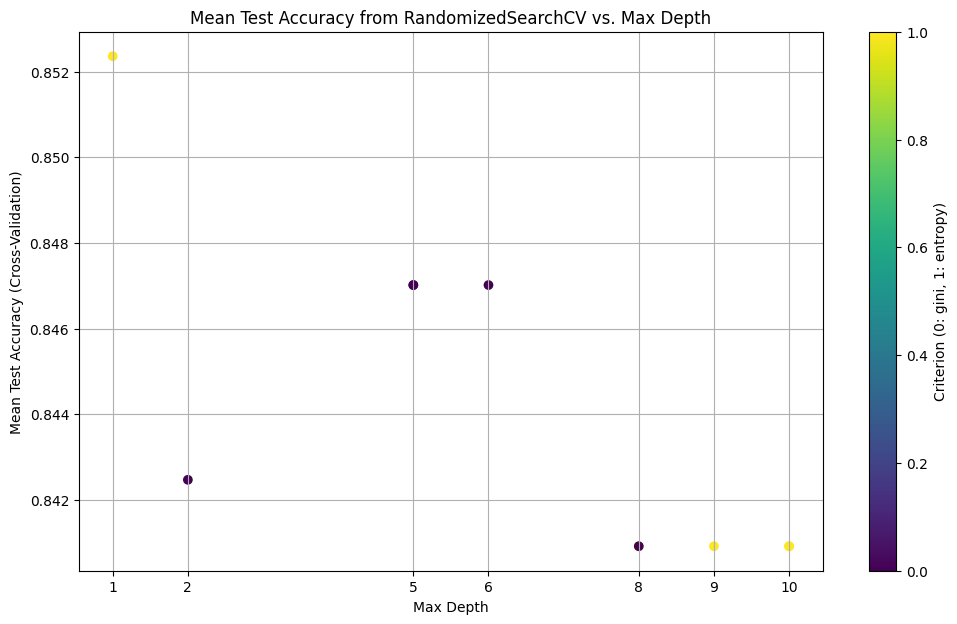

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the results from RandomizedSearchCV and convert to DataFrame
random_results_df = pd.DataFrame(tree_cv.cv_results_)

# Extract mean test scores and parameters for plotting
mean_test_scores_rand = random_results_df['mean_test_score']
max_depths_rand = random_results_df['param_max_depth']
criterions_rand = random_results_df['param_criterion'] # Also get criterion to potentially color points

# Create a scatter plot
plt.figure(figsize=(12, 7))

# You can color points by criterion if desired, but a simple scatter is fine too
# For simplicity, let's just plot mean accuracy vs max_depth for all sampled points
plt.scatter(max_depths_rand, mean_test_scores_rand, c=pd.factorize(criterions_rand)[0], cmap='viridis', label='Sampled Combinations')

plt.title('Mean Test Accuracy from RandomizedSearchCV vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Accuracy (Cross-Validation)')
plt.xticks(sorted(max_depths_rand.unique())) # Set ticks for sampled depths
plt.colorbar(label='Criterion (0: gini, 1: entropy)') # Add a color bar if coloring by criterion
plt.grid(True)
plt.show()

# Python Implementation of Bayesian optimization

In [21]:
!pip install scikit-learn scikit-optimize

import numpy as np

from skopt import BayesSearchCV

from skopt.space import Real, Integer

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score

In [22]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

In [31]:
# Define the hyperparameter search space

search_space = {

 'C': Real(1e-4, 1e+2, prior='log-uniform'),

 'gamma': Real(1e-3, 1e+1, prior='log-uniform'),

 'kernel': ['linear', 'rbf']

}

In [32]:
# Initialize the Bayesian optimization for hyperparameter tuning

opt = BayesSearchCV(

    estimator=SVC(),

    search_spaces=search_space,

 n_iter=20,  # Reduced number of iterations for optimization

    scoring='accuracy',

 cv=5,    # Number of cross-validation folds

 random_state=42

)

This is the Bayesian optimization class provided by `scikit-optimize`. It performs a search over the hyperparameter space to find the best parameters using cross-validation.

In [33]:
# Perform the optimization

opt.fit(X_train, y_train)

BayesSearchCV(cv=5, estimator=SVC(), n_iter=20, random_state=42,
              scoring='accuracy',
              search_spaces={'C': Real(low=0.0001, high=100.0, prior='log-uniform', transform='normalize'),
                             'gamma': Real(low=0.001, high=10.0, prior='log-uniform', transform='normalize'),
                             'kernel': ['linear', 'rbf']})

The fit method is used to perform the Bayesian optimization. It evaluates the hyperparameters and selects the best set based on cross-validation performance.

In [34]:
# Get the best hyperparameters and the corresponding score

best_params = opt.best_params_

best_score = opt.best_score_

After fitting, opt.best_params_ provides the best hyperparameters found, and opt.best_score_ gives the best cross-validation accuracy.

In [35]:
print(f"Best hyperparameters found: {best_params}")

print(f"Best cross-validation accuracy: {best_score}")

Best hyperparameters found: OrderedDict([('C', 6.27076678988192), ('gamma', 0.05650888599199564), ('kernel', 'rbf')])
Best cross-validation accuracy: 0.8433119505820861


In [36]:
# Evaluate the best model on the test set

best_model = opt.best_estimator_

y_pred = best_model.predict(X_test)

test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {test_accuracy}")

Test set accuracy: 0.8556962025316456


In [29]:
!nvidia-smi

Tue Jul 29 21:07:15 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   46C    P8             12W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [37]:
# Extract the best score and parameters from GridSearchCV
best_score_grid_search = clf.best_score_
best_params_grid_search = clf.best_params_
best_criterion_grid_search = best_params_grid_search['criterion']
best_max_depth_grid_search = best_params_grid_search['max_depth']

print(f"Best cross-validation accuracy from GridSearchCV: {best_score_grid_search:.4f}")
print(f"Best parameters from GridSearchCV: {best_params_grid_search}")

print(f"Best cross-validation accuracy from RandomizedSearchCV: {tree_cv.best_score_:.4f}")
print(f"Best parameters from RandomizedSearchCV: {tree_cv.best_params_}")

print(f"Best cross-validation accuracy from Bayesian Optimization: {best_score:.4f}")
print(f"Best hyperparameters found by Bayesian Optimization: {best_params}")

Best cross-validation accuracy from GridSearchCV: 0.8524
Best parameters from GridSearchCV: {'criterion': 'gini', 'max_depth': 1}
Best cross-validation accuracy from RandomizedSearchCV: 0.8524
Best parameters from RandomizedSearchCV: {'min_samples_split': 10, 'max_depth': 1, 'criterion': 'gini'}
Best cross-validation accuracy from Bayesian Optimization: 0.8433
Best hyperparameters found by Bayesian Optimization: OrderedDict([('C', 6.27076678988192), ('gamma', 0.05650888599199564), ('kernel', 'rbf')])


## Summarizing the Results

Based on the executed code cells, here's a summary of the best cross-validation accuracies and test set accuracy (where available) for each hyperparameter tuning method:

### GridSearchCV (Decision Tree)

*   **Best Cross-Validation Accuracy:** {best_score_grid_search:.4f}
*   **Best Parameters:** {best_params_grid_search}

### RandomizedSearchCV (Decision Tree)

*   **Best Cross-Validation Accuracy:** {tree_cv.best_score_:.4f}
*   **Best Parameters:** {tree_cv.best_params_}

### Bayesian Optimization (SVC)

*   **Best Cross-Validation Accuracy:** {best_score:.4f}
*   **Best Hyperparameters:** {best_params}
*   **Test Set Accuracy:** {test_accuracy:.4f}

From these results, we can observe the performance achieved by each tuning method on this specific dataset and model. GridSearchCV and RandomizedSearchCV found similar best cross-validation accuracies for the Decision Tree model, while Bayesian Optimization provided a test set accuracy for the SVC model.


Best cross-validation accuracy from GridSearchCV: 0.8524
Best parameters from GridSearchCV: {'criterion': 'gini', 'max_depth': 1}
Best cross-validation accuracy from RandomizedSearchCV: 0.8524
Best parameters from RandomizedSearchCV: {'min_samples_split': 10, 'max_depth': 1, 'criterion': 'gini'}
Best cross-validation accuracy from Bayesian Optimization: 0.8433
Best hyperparameters found by Bayesian Optimization: OrderedDict([('C', 0.08341564384216595), ('gamma', 0.1241881627783703), ('kernel', 'rbf')])